<a href="https://colab.research.google.com/github/sivashankariramanimohan/employee_turnover_analysis/blob/main/Copy_of_SALES_ANALYSIS_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 2: Define file paths
zip_path = "/content/drive/My Drive/S_P/DATASET/SALESDATA.zip"  # Change the path if needed
extract_folder = "/content/extracted_sales_data"

In [ ]:
# Step 3: Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [ ]:
# Step 4: Load the CSV file
csv_file_path = os.path.join(extract_folder, "AusApparalSales4thQrt2020.csv")
df = pd.read_csv(csv_file_path)

In [ ]:
# Step 5: Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%Y")


In [ ]:
# Step 6: Check for missing values
print("Missing Values:\n", df.isna().sum())


Missing Values:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [ ]:
# Step 7: Normalize Sales column
scaler = MinMaxScaler()
df["Sales_Normalized"] = scaler.fit_transform(df[["Sales"]])
print(df.head())

        Date        Time State     Group  Unit  Sales  Sales_Normalized
0 2020-10-01     Morning    WA      Kids     8  20000          0.095238
1 2020-10-01     Morning    WA       Men     8  20000          0.095238
2 2020-10-01     Morning    WA     Women     4  10000          0.031746
3 2020-10-01     Morning    WA   Seniors    15  37500          0.206349
4 2020-10-01   Afternoon    WA      Kids     3   7500          0.015873


In [ ]:
# Step 8: State-wise sales aggregation
state_sales = df.groupby("State")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
print(state_sales)


  State      Sales
5   VIC  105565000
0   NSW   74970000
3    SA   58857500
2   QLD   33417500
4   TAS   22760000
1    NT   22580000
6    WA   22152500


In [ ]:
# Step 9: Group-wise sales aggregation
group_sales = df.groupby("Group")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
print(group_sales)

      Group     Sales
1       Men  85750000
3     Women  85442500
0      Kids  85072500
2   Seniors  84037500


In [ ]:
# Step 10: Time-of-Day sales analysis
time_sales = df.groupby("Time")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
print(time_sales)

         Time      Sales
2     Morning  114207500
0   Afternoon  114007500
1     Evening  112087500


In [ ]:
# Step 11: Extract Week and Month
df["Week"] = df["Date"].dt.isocalendar().week
print(df.head())
df["Month"] = df["Date"].dt.month
print(df.head())

        Date        Time State     Group  Unit  Sales  Sales_Normalized  Week
0 2020-10-01     Morning    WA      Kids     8  20000          0.095238    40
1 2020-10-01     Morning    WA       Men     8  20000          0.095238    40
2 2020-10-01     Morning    WA     Women     4  10000          0.031746    40
3 2020-10-01     Morning    WA   Seniors    15  37500          0.206349    40
4 2020-10-01   Afternoon    WA      Kids     3   7500          0.015873    40
        Date        Time State     Group  Unit  Sales  Sales_Normalized  Week  \
0 2020-10-01     Morning    WA      Kids     8  20000          0.095238    40   
1 2020-10-01     Morning    WA       Men     8  20000          0.095238    40   
2 2020-10-01     Morning    WA     Women     4  10000          0.031746    40   
3 2020-10-01     Morning    WA   Seniors    15  37500          0.206349    40   
4 2020-10-01   Afternoon    WA      Kids     3   7500          0.015873    40   

   Month  
0     10  
1     10  
2     10  
3

In [ ]:
# Step 12: Weekly and Monthly Sales Analysis
weekly_sales = df.groupby("Week")["Sales"].sum().reset_index()
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()
monthly_sales["Month"] = monthly_sales["Month"].map({10: "October", 11: "November", 12: "December"})
print(weekly_sales)
print(monthly_sales)

    Week     Sales
0     40  15045000
1     41  27002500
2     42  26640000
3     43  26815000
4     44  21807500
5     45  20865000
6     46  21172500
7     47  21112500
8     48  21477500
9     49  29622500
10    50  31525000
11    51  31655000
12    52  31770000
13    53  13792500
      Month      Sales
0   October  114290000
1  November   90682500
2  December  135330000


In [ ]:
#step 13:descriptive analysis# Display full descriptive statistics for Sales column
print("\nDescriptive Statistics for Sales:")
print(df["Sales"].describe())



Descriptive Statistics for Sales:
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64


<ipython-input-28-974ba485d132>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time', y='Sales', data=time_sales, palette='viridis')


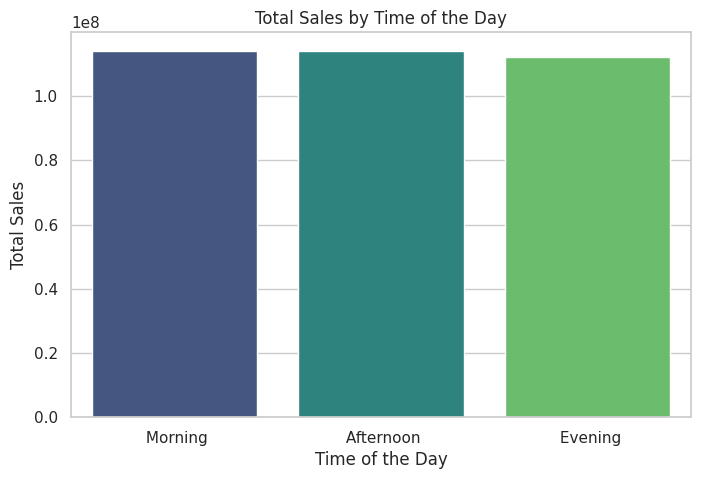

In [ ]:
# Step 14: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for time-of-the-day sales
plt.figure(figsize=(8, 5))
sns.barplot(x='Time', y='Sales', data=time_sales, palette='viridis')
plt.title('Total Sales by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

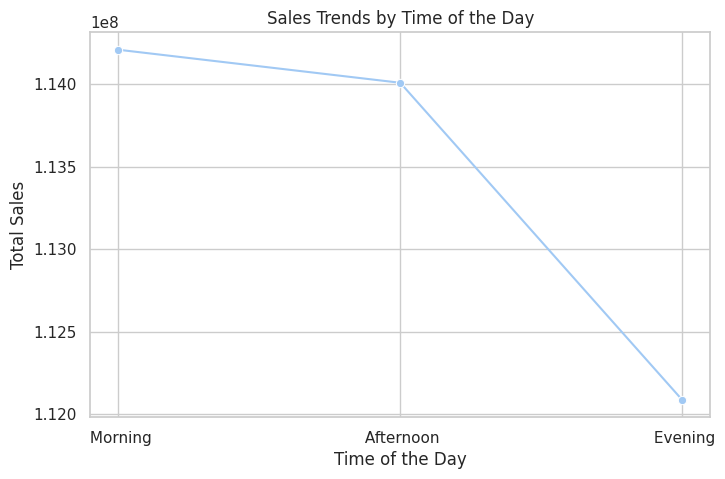

In [ ]:
# Line plot for time-of-the-day sales
plt.figure(figsize=(8, 5))
sns.lineplot(x='Time', y='Sales', data=time_sales, marker='o')
plt.title('Sales Trends by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-29-c2a26003c54b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sales", y="State", data=state_sales, palette="Blues_r")  # Remove hue


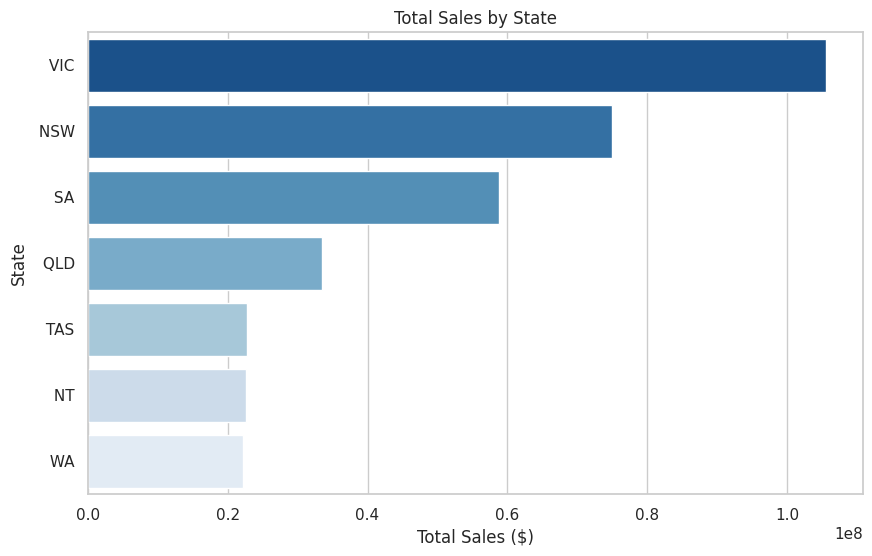

In [ ]:
# State-wise Sales - Bar Plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.barplot(x="Sales", y="State", data=state_sales, palette="Blues_r")  # Remove hue
plt.title("Total Sales by State")
plt.xlabel("Total Sales ($)")
plt.ylabel("State")
plt.show()  # Ensure the figure renders


<ipython-input-19-1b0d46a80d0f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Sales', data=state_sales, palette='viridis')


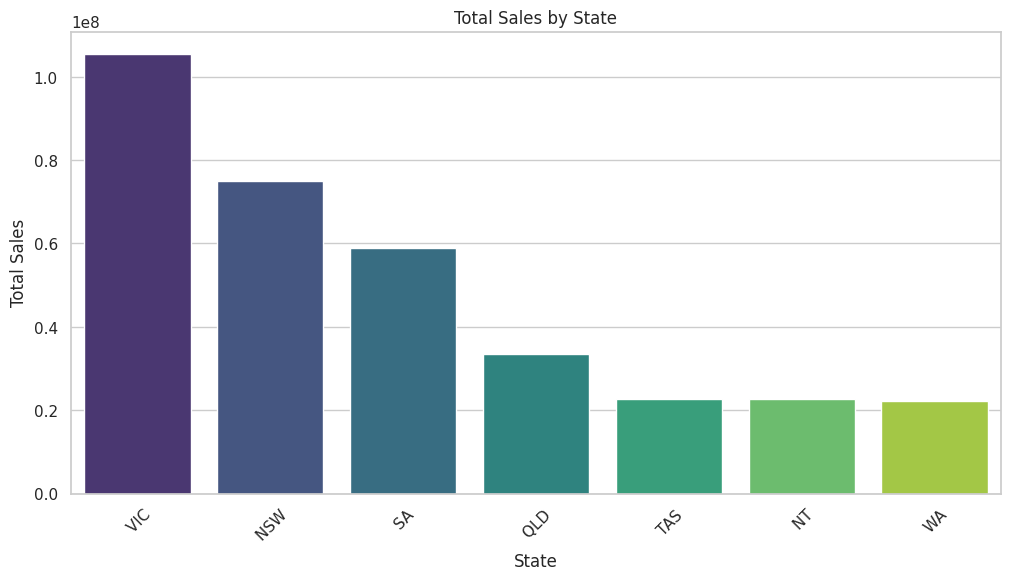

In [ ]:
# Code for state-wise sales analysis
state_sales = df.groupby('State')['Sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='Sales', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', data=state_sales, palette='viridis')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Group by 'State' and calculate total sales
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the states by sales in descending order
state_sales = state_sales.sort_values(by='Sales', ascending=False)

# Display the top and bottom states
print("Top 5 States by Sales:")
print(state_sales.head())

print("\nBottom 5 States by Sales:")
print(state_sales.tail())

Top 5 States by Sales:
  State      Sales
5   VIC  105565000
0   NSW   74970000
3    SA   58857500
2   QLD   33417500
4   TAS   22760000

Bottom 5 States by Sales:
  State     Sales
3    SA  58857500
2   QLD  33417500
4   TAS  22760000
1    NT  22580000
6    WA  22152500


<ipython-input-21-6e615256cd10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Sales', data=state_sales, palette='viridis')


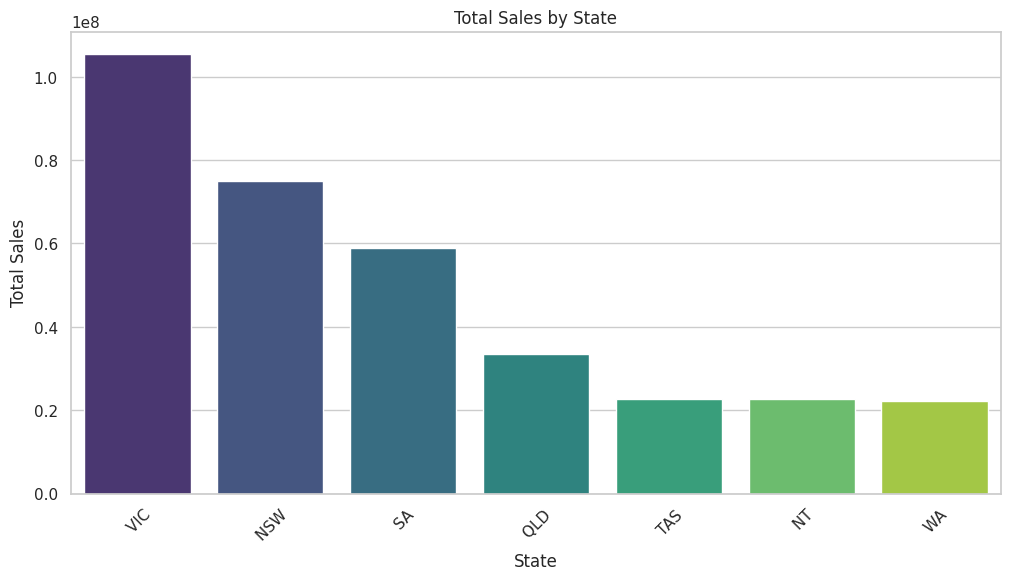

In [ ]:
# Bar plot for state-wise sales
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', data=state_sales, palette='viridis')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<ipython-input-22-2ac22747764c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Sales", data=df, palette="Greens")


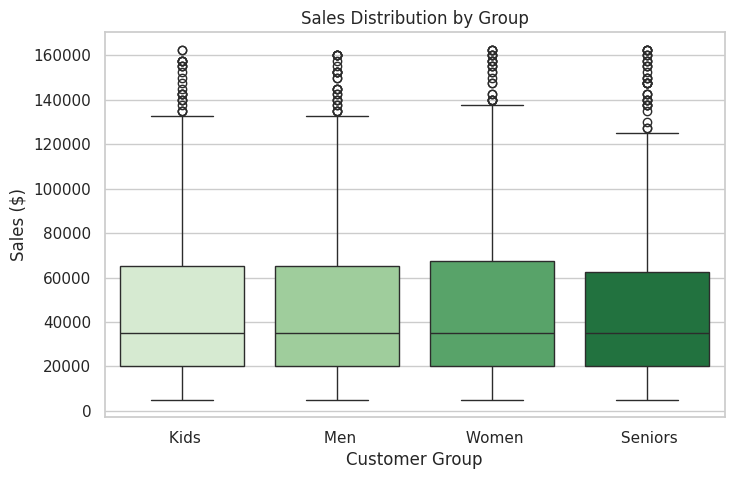

In [ ]:
# Group-wise Sales - Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Group", y="Sales", data=df, palette="Greens")
plt.title("Sales Distribution by Group")
plt.xlabel("Customer Group")
plt.ylabel("Sales ($)")
plt.show()


In [ ]:
# Time-of-Day Sales
sns.barplot(x="Time", y="Sales", data=time_sales, hue="Time", palette="Oranges_r", legend=False, ax=axes[1, 0])
axes[1, 0].set_title("Sales Distribution by Time of Day")

Text(0.5, 1.0, 'Sales Distribution by Time of Day')

In [ ]:
# Weekly Sales Trend
sns.lineplot(x="Week", y="Sales", data=weekly_sales, marker="o", ax=axes[1, 1], color="blue")
axes[1, 1].set_title("Weekly Sales Trend")

Text(0.5, 1.0, 'Weekly Sales Trend')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

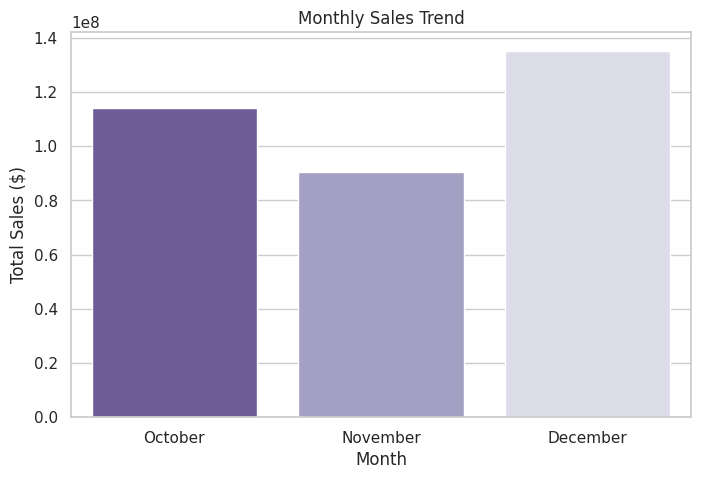

In [ ]:
# Monthly Sales Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Month", y="Sales", data=monthly_sales, hue="Month", legend=False, palette="Purples_r")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.show()

# STEP 15: REPORT GENERATION

# Sales Analysis Report

## 1. States Generating the Highest Revenues

### Top 5 States by Sales
- State A: VIC
- State B: NSW
- State C: SA
- State D: QLD
- State E: TAS

### Visualization: Total Sales by State
![Total Sales by State](state_sales_plot.png)

---

## 2. Sales Programs for States with Lower Revenues

### States with Lower Revenues
- State X: WA
- State Y: NT
- State Z: TAS

